### Analysis of Higher Order Trend Filtering

In [17]:
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append("../")
sys.path.append("../../")
from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

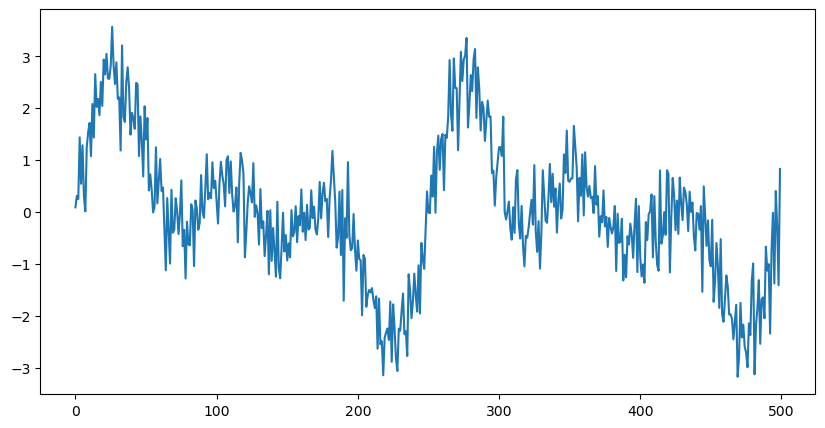

In [38]:
def generate_fake_data(n):
    """Generate fake data to test cross validation"""
    t=np.linspace(0, 4*np.pi, n)

    x=np.sin(t)+ np.sin(2*t) + np.sin(3*t)

    return (x + np.random.normal(0, 0.5, n)),x,t

x,true_fun,t=generate_fake_data(500)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, label="Noisy Signal")


x=x.reshape(-1, 1)

### Simple Case of Linear TF

In [41]:
D= Difference_Matrix(500, 1)

In [42]:
best_lambda=cross_validation(x, D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.36491660867288117
Performing cross validation for lambda = 3.6491660867288114
Performing cross validation for lambda = 36.49166086728812
Performing cross validation for lambda = 364.9166086728812
Performing cross validation for lambda = 3649.1660867288115
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.3461273162954617
Performing cross validation for lambda = 3.4612731629546167
Performing cross validation for lambda = 34.61273162954617
Performing cross validation for lambda = 346.1273162954617
Performing cross validation for lambda = 3461.2731629546165
Performing  2 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.3607160918936612
Performing cross validation for lambda = 3.607160918936612
Performing cross validation for lambda = 36.07160918936612
Performing cross validation for lambda = 360.7160918936612
Perf

In [43]:
results=adaptive_tf(x, D, best_lambda)

sol=results["sol"].x

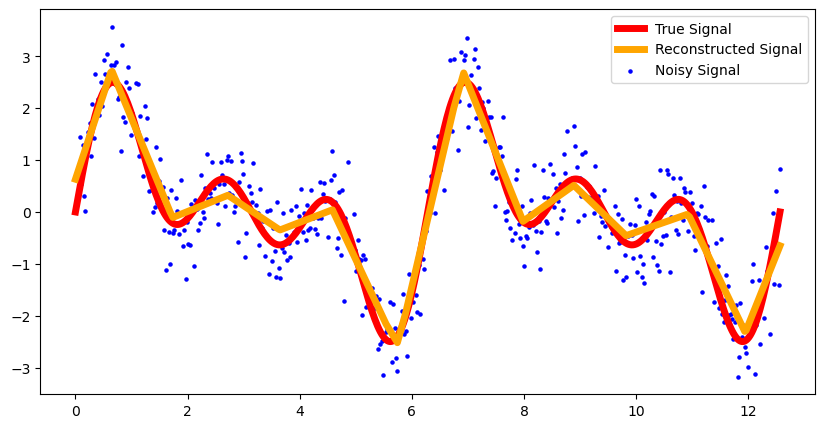

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)
ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
ax.legend()


In [45]:
D= Difference_Matrix(500, 2)

In [46]:
best_lambda=cross_validation(x, D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 50.73820114434658
Performing cross validation for lambda = 507.3820114434658
Performing cross validation for lambda = 5073.820114434658
No solution found for lambda = 5073.820114434658
Status: maxiter exceeded
Performing cross validation for lambda = 50738.20114434658
No solution found for lambda = 50738.20114434658
Status: maxiter exceeded
Performing cross validation for lambda = 507382.0114434658
No solution found for lambda = 507382.0114434658
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 49.946360585200615
Performing cross validation for lambda = 499.46360585200614
Performing cross validation for lambda = 4994.636058520061
No solution found for lambda = 4994.636058520061
Status: maxiter exceeded
Performing cross validation for lambda = 49946.360585200615
No solution found for lambda = 49946.360585200615
Status: maxi

In [47]:
results=adaptive_tf(x, D, best_lambda)

sol=results["sol"].x

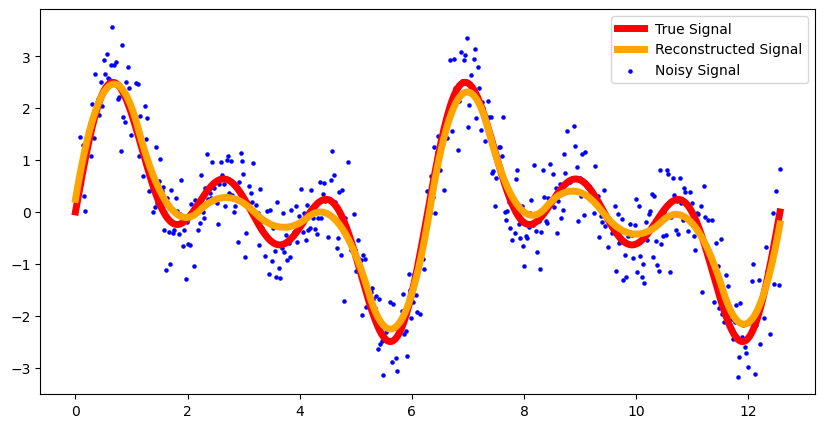

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)
ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
ax.legend()

In [63]:
D= Difference_Matrix(500, 3)

 WARNING Condition number is large: 267568740.45397577


### Compute CV on much smaller subsets of Data with larger K

- Otherwise we typically get issues with stability

In [59]:
best_lambda=cross_validation(x[:100], D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.233244788840179
Performing cross validation for lambda = 2.33244788840179
Performing cross validation for lambda = 23.3244788840179
Performing cross validation for lambda = 233.244788840179
Performing cross validation for lambda = 2332.44788840179
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.3205805899483226
Performing cross validation for lambda = 3.205805899483226
Performing cross validation for lambda = 32.05805899483226
Performing cross validation for lambda = 320.5805899483226
Performing cross validation for lambda = 3205.805899483226
Performing  2 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.1479064708699664
Performing cross validation for lambda = 1.4790647086996638
Performing cross validation for lambda = 14.790647086996637
Performing cross validation for lambda = 147.90647086996637
Performing 

In [64]:
results=adaptive_tf(x, D, best_lambda)

sol=results["sol"].x

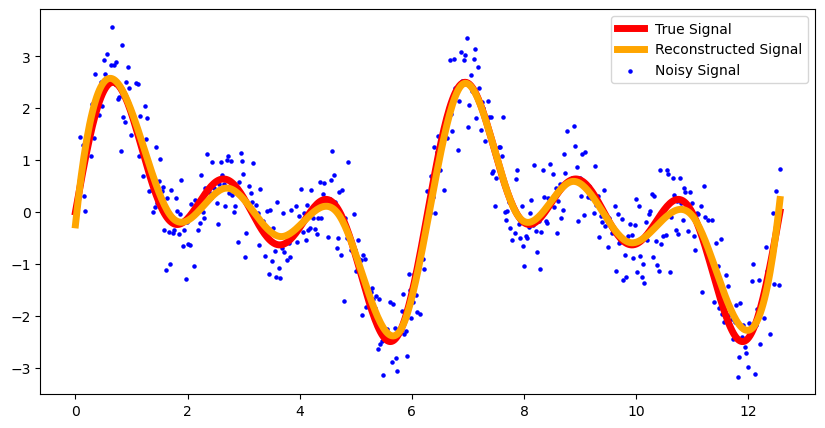

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)
ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
ax.legend()


In [68]:
D= Difference_Matrix(100, 4)

In [69]:
best_lambda=cross_validation(x[:100], D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 2.4841229582291136
Performing cross validation for lambda = 24.841229582291138
Performing cross validation for lambda = 248.41229582291137
Performing cross validation for lambda = 2484.122958229114
No solution found for lambda = 2484.122958229114
Status: maxiter exceeded
Performing cross validation for lambda = 24841.229582291136
No solution found for lambda = 24841.229582291136
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 3.8000984224937073
Performing cross validation for lambda = 38.00098422493707
Performing cross validation for lambda = 380.0098422493707
Performing cross validation for lambda = 3800.0984224937074
Performing cross validation for lambda = 38000.98422493707
No solution found for lambda = 38000.98422493707
Status: maxiter exceeded
Performing  2 out of 3 iterations of cross validation
Performing cross va

In [70]:
D= Difference_Matrix(500, 4)

results=adaptive_tf(x, D, best_lambda)

sol=results["sol"].x

 WARNING Condition number is large: 14042837603.88677
WARNING Error in linear solver:  1.3119266839556332e-06
 WARNING Condition number is large: 267568740.45397577


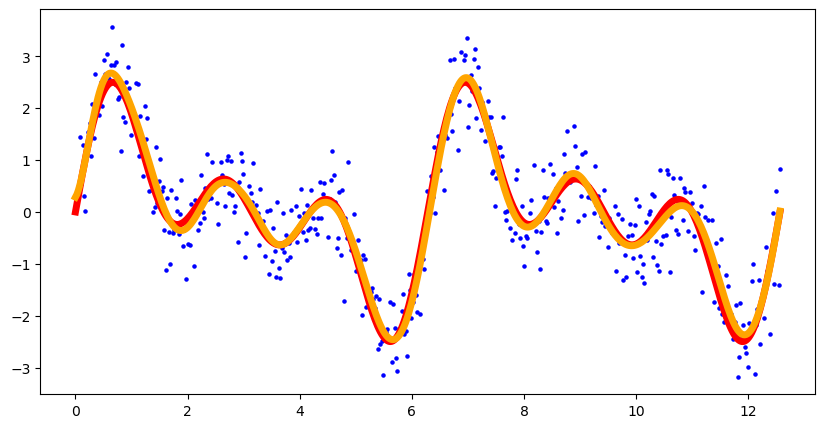

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)

ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
